### Note

### Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import uncertainties as unc

import sys
sys.path.append('../../Software/Python/Library')

import uplotlib as uplt

In [3]:
# reads the FileName and returns a label which identifies the dataset
# label = [filename, day, month, chip, aq_flux, ol_flux, analysis]
def fn_reader(filename):
    
    # return a list of floated values from the text string
    import re
    def get_numbers_from_filename(filename):
        z = re.findall(r'\d+(?:\.\d+)?', filename)
        return [float(z[s]) for s in range(len(z))]
    
    
    chip = 'None'
    if (filename.find('A') != -1): 
        chip = 'A'
    if (filename.find('B') != -1): 
        chip = 'B'
    analysis = 'None'
    if (filename.find('i') != -1): 
        analysis  = 'I'
    if (filename.find('e') != -1): 
        analysis  = 'E'
    date_d = get_numbers_from_filename(filename)[0]
    date_m = get_numbers_from_filename(filename)[1]
    ol     = get_numbers_from_filename(filename)[2]
    aq     = get_numbers_from_filename(filename)[3]
    label  = [filename, date_d, date_m, chip, ol, aq, analysis]
        
    return label

In [4]:
# returns the vector of the mean values of the property "target" indexed by the label
def df_reader(label, target):
    
    target = target.split('[')[0]
    
    values = []

    for i in np.arange(len(label)):        # runs through the files indexed by the label
        df = pd.read_csv(label[i][0])      # dataframe of the i° file
        #print(df)
        indexNamesArr  = df.index.values   # names of the rows of df
        
        for x in indexNamesArr:                                # runs through the rows of each dataframe
            if df.loc[x]['property'].split('[')[0] == target:  # finds the row of the property "target"
                values.append(df.loc[x][1:])                   # gets the values of the property
                print(label[i][0] + '\t' + target + '\t YES')
                check = 'true'
        
        # warning: the dataframe has not the "target" property 
        if check == 'false':
            print(label[i][0] + '\t' + target + '\t NO')
            values.append([np.nan, np.nan, np.nan, np.nan])
        
        check  = 'false'
                
    return values



In [5]:
# converts the array property([mean][mean std][sigma][sigma std]) in ufloat data_out([mean +- sigma])
def ufloat_converter(data_in): 
    
    data_out = []
    
    for idx in range(len(data_in)):
        data_out.append(unc.ufloat(data_in[idx][0], data_in[idx][2]))
    
    return data_out

In [6]:
# LaTex plot
FontSize = 18
plt.rc('axes',   titlesize = FontSize) # fontsize of the axes title
plt.rc('axes',   labelsize = FontSize) # fontsize of the x and y labels
plt.rc('xtick',  labelsize = FontSize) # fontsize of the tick labels
plt.rc('ytick',  labelsize = FontSize) # fontsize of the tick labels
plt.rc('legend', fontsize  = FontSize) # legend fontsize
plt.rc('figure', titlesize = FontSize) # fontsize of the figure title

matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.size' :  18,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

### Importing data

In [7]:
# label = [filename, day, month, chip, aq_flux, ol_flux, analysis]
# label_E for electronic analysis
# label_I for image analysis

import glob, os
os.chdir("./")
label = [];
label_E_A = []
label_E_B = []
label_I_A = []
label_I_B = []
i = 0
for filename in glob.glob("*.csv"):
    label.append(fn_reader(filename))
    if label[i][6] == 'E':
        if label[i][3] == 'A':    
            label_E_A.append(fn_reader(filename))
        if label[i][3] == 'B':    
            label_E_B.append(fn_reader(filename))
    if label[i][6] == 'I':
        if label[i][3] == 'A':    
            label_I_A.append(fn_reader(filename))
        if label[i][3] == 'B':    
            label_I_B.append(fn_reader(filename))
    i = i+1

label_E_A = np.array(label_E_A)
label_E_B = np.array(label_E_B)
label_I_A = np.array(label_I_A)
label_I_B = np.array(label_I_B)

print ('Label_E_A:\n')
print(label_E_A)
print ('\n\n Label_E_B:\n')
print(label_E_B)
print ('\n\n Label_I_A:\n')
print(label_I_A)
print ('\n\n Label_I_B:\n')
print(label_I_B)

Label_E_A:

[['2-12_A-ol0.5-aq0.5_e.csv' '2.0' '12.0' 'A' '0.5' '0.5' 'E']]


 Label_E_B:

[['2-12_B-ol10-aq10_e.csv' '2.0' '12.0' 'B' '10.0' '10.0' 'E']
 ['2-12_B-ol15-aq5_e.csv' '2.0' '12.0' 'B' '15.0' '5.0' 'E']
 ['2-12_B-ol2-aq2_e.csv' '2.0' '12.0' 'B' '2.0' '2.0' 'E']
 ['2-12_B-ol3-aq7_e.csv' '2.0' '12.0' 'B' '3.0' '7.0' 'E']
 ['2-12_B-ol30-aq10_e.csv' '2.0' '12.0' 'B' '30.0' '10.0' 'E']
 ['2-12_B-ol5-aq15_e.csv' '2.0' '12.0' 'B' '5.0' '15.0' 'E']
 ['2-12_B-ol5-aq5_e.csv' '2.0' '12.0' 'B' '5.0' '5.0' 'E']
 ['2-12_B-ol7-aq3_e.csv' '2.0' '12.0' 'B' '7.0' '3.0' 'E']]


 Label_I_A:

[['2-12_A-ol0.5-aq0.5_i.csv' '2.0' '12.0' 'A' '0.5' '0.5' 'I']
 ['2-12_A-ol2-aq2_i.csv' '2.0' '12.0' 'A' '2.0' '2.0' 'I']
 ['2-12_A-ol5-aq5_i.csv' '2.0' '12.0' 'A' '5.0' '5.0' 'I']]


 Label_I_B:

[['2-12_B-ol10-aq10_i.csv' '2.0' '12.0' 'B' '10.0' '10.0' 'I']
 ['2-12_B-ol15-aq5_i.csv' '2.0' '12.0' 'B' '15.0' '5.0' 'I']
 ['2-12_B-ol2-aq2_i.csv' '2.0' '12.0' 'B' '2.0' '2.0' 'I']
 ['2-12_B-ol3-aq7_i.csv' '2.0

### Data arrangement

In [8]:
# Electronic dataframes -----------------------------------
# temporal distance
E_B_temp_dist_1   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'Temporal distance 1 [s]'))))
E_B_temp_dist_2   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'Temporal distance 2 [s]'))))
E_B_temp_dist_avg = (E_B_temp_dist_1 + E_B_temp_dist_2)/2
E_A_temp_dist_1   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'Temporal distance 1 [s]'))))
E_A_temp_dist_2   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'Temporal distance 2 [s]'))))
E_A_temp_dist_avg = (E_A_temp_dist_1 + E_A_temp_dist_2)/2
# temporal size
E_B_temp_size_1   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'temporal size 1 [s]'))))
E_B_temp_size_2   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'temporal size 2 [s]'))))
E_B_temp_size_avg = (E_B_temp_size_1 + E_B_temp_size_2)/2
E_A_temp_size_1   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'temporal size 1 [s]'))))
E_A_temp_size_2   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'temporal size 2 [s]'))))
E_A_temp_size_avg = (E_A_temp_size_1 + E_A_temp_size_2)/2
# temporal period
E_B_temp_peri_1   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'temporal period 1 [s]'))))
E_B_temp_peri_2   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'temporal period 2 [s]'))))
E_B_temp_peri_avg = (E_B_temp_peri_1 + E_B_temp_peri_2)/2
E_A_temp_peri_1   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'temporal period 1 [s]'))))
E_A_temp_peri_2   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'temporal period 2 [s]'))))
E_A_temp_peri_avg = (E_A_temp_peri_1 + E_A_temp_peri_2)/2
# dt d)etectors
E_B_dt_detectrs   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'dt detectors [s]'))))
E_A_dt_detectrs   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'dt detectors [s]'))))
# velocity
E_B_velocities    = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'velocity [s]'))))
E_A_velocities    = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'velocity [s]'))))
# spatial size
E_B_spat_size_1   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'spatial size 1 [s]'))))
E_B_spat_size_2   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'spatial size 2 [s]'))))
E_B_spat_size_avg = (E_B_spat_size_1 + E_B_spat_size_2)/2
E_A_spat_size_1   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'spatial size 1 [s]'))))
E_A_spat_size_2   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'spatial size 2 [s]'))))
E_A_spat_size_avg = (E_A_spat_size_1 + E_A_spat_size_2)/2
# spatial distance
E_B_spat_dist_1   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'spatial distance 1 [s]'))))
E_B_spat_dist_2   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'spatial distance 2 [s]'))))
E_B_spat_dist_avg = (E_B_spat_dist_1 + E_B_spat_dist_2)/2
E_A_spat_dist_1   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'spatial distance 1 [s]'))))
E_A_spat_dist_2   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'spatial distance 2 [s]'))))
E_A_spat_dist_avg = (E_A_spat_dist_1 + E_A_spat_dist_2)/2
# fiber spatial size
E_B_fibe_size_1   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'fiber spatial size 1 [s]'))))
E_B_fibe_size_2   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'fiber spatial size 2 [s]'))))
E_B_fibe_size_avg = (E_B_fibe_size_1 + E_B_fibe_size_2)/2
E_A_fibe_size_1   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'fiber spatial size 1 [s]'))))
E_A_fibe_size_2   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'fiber spatial size 2 [s]'))))
E_A_fibe_size_avg = (E_A_fibe_size_1 + E_A_fibe_size_2)/2

# Image dataframes -----------------------------------------
# distance
I_B_distance_w = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'distance w [mm]'))))
I_B_distance_n = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'distance n [mm]'))))
I_A_distance_w = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'distance w [mm]'))))
I_A_distance_n = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'distance n [mm]'))))
# wavelength
I_B_wavelength = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'wavelength [mm]'))))
I_A_wavelength = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'wavelength [mm]'))))
# size
I_B_size_w     = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'size w [mm]'))))
I_B_size_n     = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'size n [mm]'))))
I_A_size_w     = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'size w [mm]'))))
I_A_size_n     = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'size n [mm]'))))
# meniscus size
I_B_meniscus_b = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'meniscus size b [mm]'))))
I_B_meniscus_f = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'meniscus size f [mm]'))))
I_A_meniscus_b = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'meniscus size b [mm]'))))
I_A_meniscus_f = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'meniscus size f [mm]'))))
# velocity
I_B_velocity_w = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'velocity w [mm/s]'))))
I_B_velocity_n = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'velocity n [mm/s]'))))
I_A_velocity_w = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'velocity w [mm/s]'))))
I_A_velocity_n = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'velocity n [mm/s]'))))

# fluxes --------------------------------------------------
# electronic - chip B
Flux_aq_E_B  = np.array(label_E_B[:,4]).astype(float)
Flux_ol_E_B  = np.array(label_E_B[:,5]).astype(float)
Flux_tot_E_B = Flux_aq_E_B + Flux_ol_E_B
# electronic - chip A
Flux_aq_E_A  = np.array(label_E_A[:,4]).astype(float)
Flux_ol_E_A  = np.array(label_E_A[:,5]).astype(float)
Flux_tot_E_A = Flux_aq_E_A + Flux_ol_E_A
# image - chip B
Flux_aq_I_B  = np.array(label_I_B[:,4]).astype(float)
Flux_ol_I_B  = np.array(label_I_B[:,5]).astype(float)
Flux_tot_I_B = Flux_aq_I_B + Flux_ol_I_B
# image - chip A
Flux_aq_I_A  = np.array(label_I_A[:,4]).astype(float)
Flux_ol_I_A  = np.array(label_I_A[:,5]).astype(float)
Flux_tot_I_A = Flux_aq_I_A + Flux_ol_I_A


2-12_B-ol10-aq10_e.csv	Temporal distance 1 	 YES
2-12_B-ol15-aq5_e.csv	Temporal distance 1 	 YES
2-12_B-ol2-aq2_e.csv	Temporal distance 1 	 YES
2-12_B-ol3-aq7_e.csv	Temporal distance 1 	 YES
2-12_B-ol30-aq10_e.csv	Temporal distance 1 	 YES
2-12_B-ol5-aq15_e.csv	Temporal distance 1 	 YES
2-12_B-ol5-aq5_e.csv	Temporal distance 1 	 YES
2-12_B-ol7-aq3_e.csv	Temporal distance 1 	 YES
2-12_B-ol10-aq10_e.csv	Temporal distance 2 	 YES
2-12_B-ol15-aq5_e.csv	Temporal distance 2 	 YES
2-12_B-ol2-aq2_e.csv	Temporal distance 2 	 YES
2-12_B-ol3-aq7_e.csv	Temporal distance 2 	 YES
2-12_B-ol30-aq10_e.csv	Temporal distance 2 	 YES
2-12_B-ol5-aq15_e.csv	Temporal distance 2 	 YES
2-12_B-ol5-aq5_e.csv	Temporal distance 2 	 YES
2-12_B-ol7-aq3_e.csv	Temporal distance 2 	 YES
2-12_A-ol0.5-aq0.5_e.csv	Temporal distance 1 	 YES
2-12_A-ol0.5-aq0.5_e.csv	Temporal distance 2 	 YES
2-12_B-ol10-aq10_e.csv	temporal size 1 	 YES
2-12_B-ol15-aq5_e.csv	temporal size 1 	 YES
2-12_B-ol2-aq2_e.csv	temporal size 1 	 YES
2-

2-12_B-ol10-aq10_i.csv	velocity n 	 YES
2-12_B-ol15-aq5_i.csv	velocity n 	 YES
2-12_B-ol2-aq2_i.csv	velocity n 	 YES
2-12_B-ol3-aq7_i.csv	velocity n 	 YES
2-12_B-ol5-aq15_i.csv	velocity n 	 YES
2-12_B-ol5-aq5_i.csv	velocity n 	 YES
2-12_B-ol7-aq3_i.csv	velocity n 	 YES
2-12_A-ol0.5-aq0.5_i.csv	velocity w 	 YES
2-12_A-ol2-aq2_i.csv	velocity w 	 YES
2-12_A-ol5-aq5_i.csv	velocity w 	 YES
2-12_A-ol0.5-aq0.5_i.csv	velocity n 	 YES
2-12_A-ol2-aq2_i.csv	velocity n 	 YES
2-12_A-ol5-aq5_i.csv	velocity n 	 YES


In [12]:
from importlib import reload
reload(uplt)

<module 'uplotlib' from '../../Software/Python/Library/uplotlib.py'>

### Wavelength (period) vs total flux

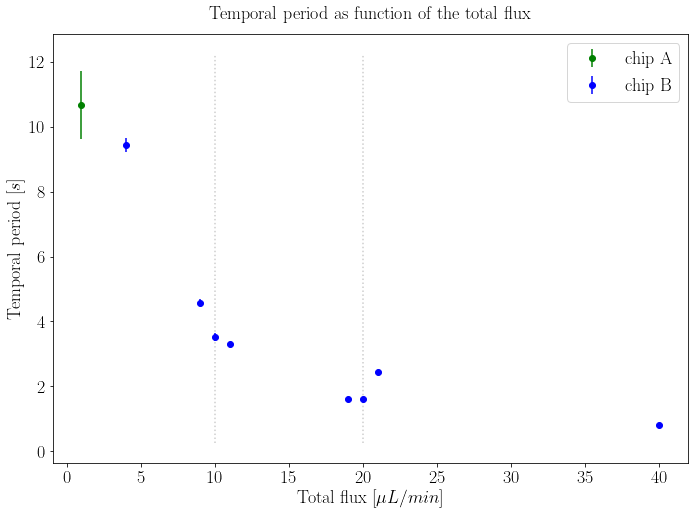

In [14]:
fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('Total flux $[\mu L/min]$')
ax.set_ylabel('Temporal period $[s]$')

dm = uplt.DataMisaligner(x_misalignment=1)

dm.add(Flux_tot_E_A, E_A_temp_peri_avg, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
dm.add(Flux_tot_E_B, E_B_temp_peri_avg, ax = ax,  fmt='o', alpha = 1., color='blue', label = 'chip B') 
dm.plot(ax)

ax.legend(loc='best')
plt.title('Temporal period as function of the total flux', loc='center', pad=15)
fig.tight_layout()
plt.show()

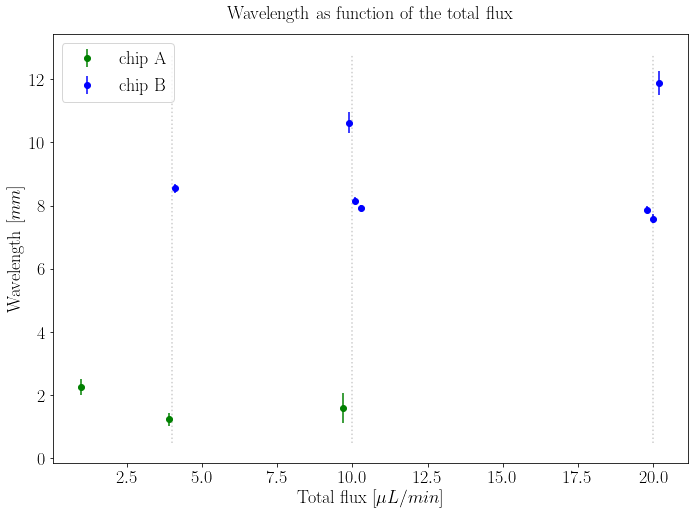

In [16]:
fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('Total flux $[\mu L/min]$')
ax.set_ylabel('Wavelength $[mm]$')

dm = uplt.DataMisaligner(x_misalignment=0.2)

dm.add(Flux_tot_I_A, I_A_wavelength, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
dm.add(Flux_tot_I_B, I_B_wavelength, ax = ax,  fmt='o', alpha = 1., color='blue', label = 'chip B') 
dm.plot(ax)

ax.legend(loc='best')
plt.title('Wavelength as function of the total flux', loc='center', pad=15)
fig.tight_layout()
plt.show()

### ratio distance/size vs ratio aq flux/ oil flux

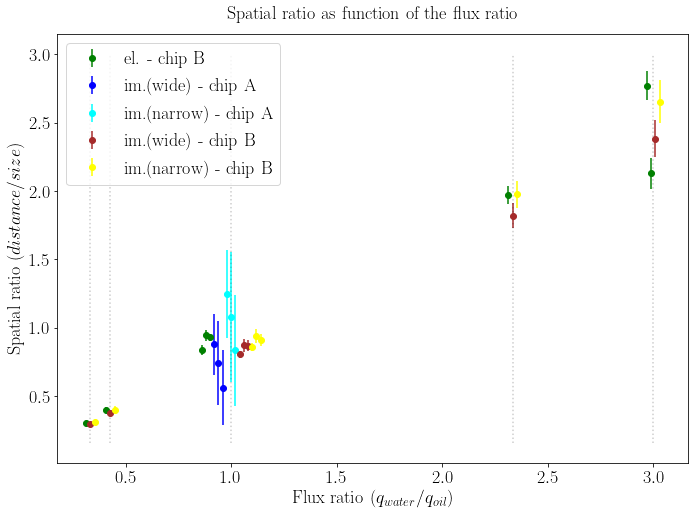

In [20]:
# flux ratio
Flux_ratio_I_A = Flux_aq_I_A/Flux_ol_I_A              
Flux_ratio_I_B = Flux_aq_I_B/Flux_ol_I_B
Flux_ratio_E_A = Flux_aq_E_A/Flux_ol_E_A
Flux_ratio_E_B = Flux_aq_E_B/Flux_ol_E_B
# size/distance ratio
E_A_sd_ratio   = E_A_spat_dist_avg/E_A_spat_size_avg  # electronic - chip A
E_B_sd_ratio   = E_B_spat_dist_avg/E_B_spat_size_avg  # electronic - chip B
I_A_w_sd_ratio = I_A_distance_w/I_A_size_w            # image (wide) - chip A
I_B_w_sd_ratio = I_B_distance_w/I_B_size_w            # image (wide) - chip B
I_A_n_sd_ratio = I_A_distance_n/I_A_size_n            # image (narrow) - chip A
I_B_n_sd_ratio = I_B_distance_n/I_B_size_n            # image (narrow) - chip B


fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot()
ax.set_xlabel('Flux ratio $(q_{water}/q_{oil})$')
ax.set_ylabel('Spatial ratio $(distance/size)$')

dm = uplt.DataMisaligner(x_misalignment=0.02)

#dm.add(Flux_ratio_E_A, E_A_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='green', label = 'el. - chip A')
dm.add(Flux_ratio_E_B, E_B_sd_ratio,   ax = ax,  fmt='o', alpha = 1., color='green',  label = 'el. - chip B') 
dm.add(Flux_ratio_I_A, I_A_w_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='blue',   label = 'im.(wide) - chip A') 
dm.add(Flux_ratio_I_A, I_A_n_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='cyan',   label = 'im.(narrow) - chip A')
dm.add(Flux_ratio_I_B, I_B_w_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='brown',  label = 'im.(wide) - chip B')  
dm.add(Flux_ratio_I_B, I_B_n_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='yellow', label = 'im.(narrow) - chip B') 
dm.plot(ax)

ax.legend(loc='best')
plt.title('Spatial ratio as function of the flux ratio', loc='center', pad=15)
fig.tight_layout()
plt.show()

### fiber spatial size

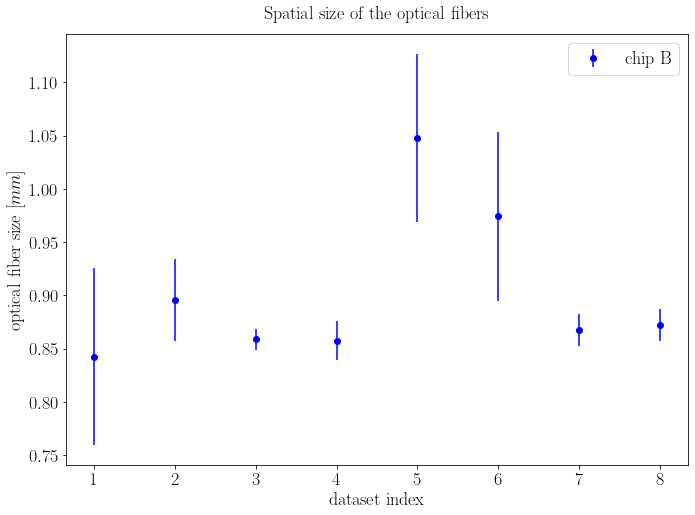

In [24]:
fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('dataset index')
ax.set_ylabel('optical fiber size $[mm]$')

data_idx_B = np.arange(1, len(E_B_fibe_size_avg)+1, 1)

#uplt.plot(Flux_tot_E_A, E_A_fibe_size_avg, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
uplt.plot(data_idx_B, E_B_fibe_size_avg, ax = ax,  fmt='o', alpha = 1., color='blue', label = 'chip B') 

ax.legend(loc='best')
plt.title('Spatial size of the optical fibers', loc='center', pad=15)
fig.tight_layout()
plt.show()

### velocity 

[4.057568517278263+/-0.03042761455876297
 4.504961776426984+/-0.012634489891600651
 0.8621993917420518+/-0.08269715740098671
 2.2377418544657597+/-0.091256219445187
 8.267345666401518+/-0.16831684940554806
 4.661699635062902+/-0.06890432407054847
 2.259454452293714+/-0.21394669022344148
 2.3973126969283007+/-0.1778065107049911]
[4.057568517278263+/-0.03042761455876297
 4.504961776426984+/-0.012634489891600651
 4.504961776426984+/-0.012634489891600651
 0.8621993917420518+/-0.08269715740098671
 2.2377418544657597+/-0.091256219445187
 8.267345666401518+/-0.16831684940554806
 4.661699635062902+/-0.06890432407054847
 2.259454452293714+/-0.21394669022344148
 2.3973126969283007+/-0.1778065107049911]


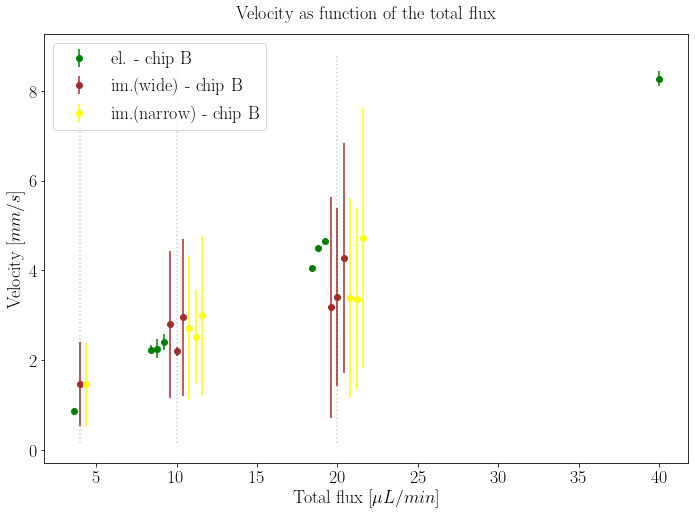

In [23]:
fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('Total flux $[\mu L/min]$')
ax.set_ylabel('Velocity $[mm/s]$')

# BUGGISSIMO: stranamente l'array E_B_velocities ha una riga in più che è un doppione (elimino manualmente)
E_B_velocities_x = np.delete(E_B_velocities, 2, 0) 

print(E_B_velocities_x)
print(E_B_velocities)

dm = uplt.DataMisaligner(x_misalignment=0.4)

#dm.add(Flux_tot_E_A, E_A_velocities, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
dm.add(Flux_tot_E_B, E_B_velocities_x, ax = ax,  fmt='o', alpha = 1., color='green', label = 'el. - chip B')
dm.add(Flux_tot_I_B, I_B_velocity_w, ax = ax,  fmt='o', alpha = 1., color='brown', label = 'im.(wide) - chip B')
dm.add(Flux_tot_I_B, I_B_velocity_n, ax = ax,  fmt='o', alpha = 1., color='yellow', label = 'im.(narrow) - chip B')
dm.plot(ax)

ax.legend(loc='best')
plt.title('Velocity as function of the total flux', loc='center', pad=15)
fig.tight_layout()
plt.show()

### meniscus size

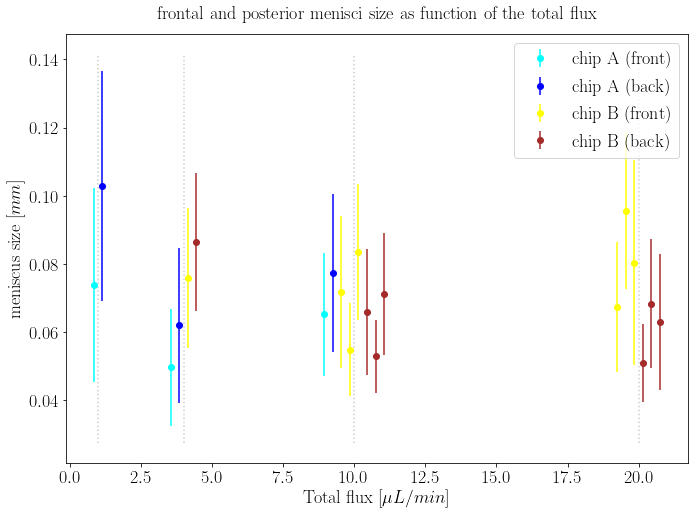

In [25]:
fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('Total flux $[\mu L/min]$')
ax.set_ylabel('meniscus size $[mm]$')

dm = uplt.DataMisaligner(x_misalignment=0.3)

#dm.add(Flux_tot_E_A, E_A_fibe_size_avg, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
dm.add(Flux_tot_I_A, I_A_meniscus_f, ax = ax,  fmt='o', alpha = 1., color='cyan', label = 'chip A (front)') 
dm.add(Flux_tot_I_A, I_A_meniscus_b, ax = ax,  fmt='o', alpha = 1., color='blue', label = 'chip A (back)')
dm.add(Flux_tot_I_B, I_B_meniscus_f, ax = ax,  fmt='o', alpha = 1., color='yellow', label = 'chip B (front)') 
dm.add(Flux_tot_I_B, I_B_meniscus_b, ax = ax,  fmt='o', alpha = 1., color='brown', label = 'chip B (back)')
dm.plot(ax)

ax.legend(loc='best')
plt.title('frontal and posterior menisci size as function of the total flux', loc='center', pad=15)
fig.tight_layout()
plt.show()